#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read Train Dataset

In [3]:
train = pd.read_csv('train.csv')

#EDA

In [4]:
train

,Id,Therapy Hours,Initial Health Score,Lifestyle Activities,Average Sleep Hours,Follow-Up Sessions,Recovery Index
0,9255,5,49,No,7,5,36
1,1562,2,48,Yes,7,6,25
2,1671,2,81,No,7,2,59
3,6088,2,46,No,6,1,22
4,6670,8,47,No,9,0,40
...,...,...,...,...,...,...,...
7995,5735,8,50,Yes,6,6,48
7996,5192,4,68,No,9,3,51
7997,5391,9,48,No,7,6,44
7998,861,1,47,No,9,0,20


##Check For NULL Values

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    8000 non-null   int64 
 1   Therapy Hours         8000 non-null   int64 
 2   Initial Health Score  8000 non-null   int64 
 3   Lifestyle Activities  8000 non-null   object
 4   Average Sleep Hours   8000 non-null   int64 
 5   Follow-Up Sessions    8000 non-null   int64 
 6   Recovery Index        8000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 437.6+ KB


##Check For Duplicate Rows

In [6]:
train.duplicated().any()

np.False_

##Outlier Presence Check

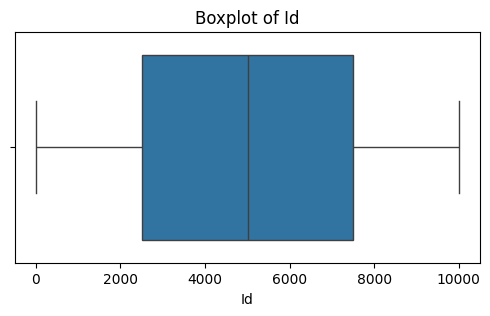

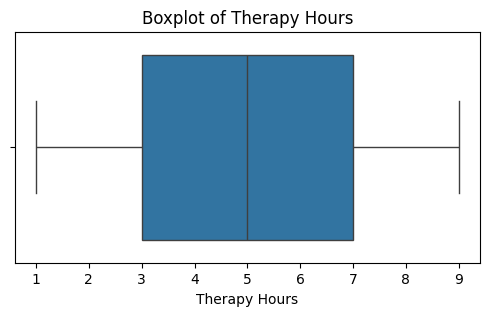

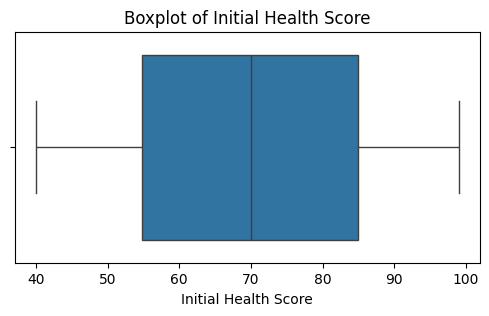

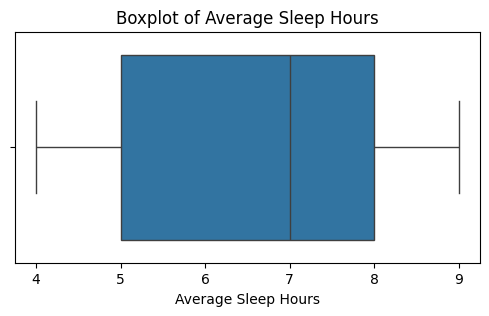

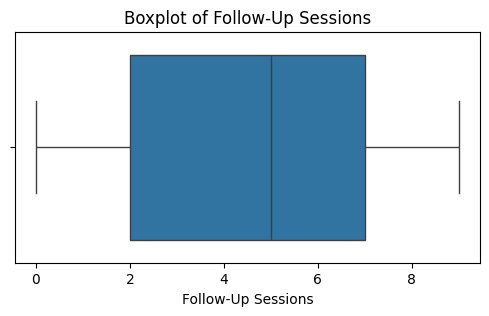

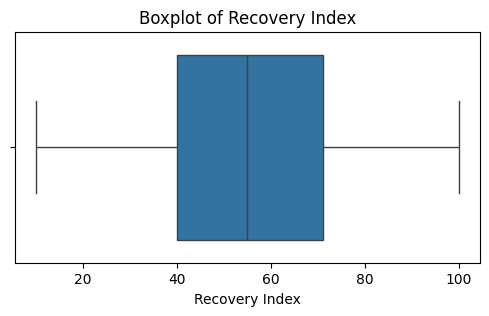

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in train.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


##Univariate and Bivariate Analysis

###Numerical Feature Analysis

In [8]:
train.describe()

,Id,Therapy Hours,Initial Health Score,Average Sleep Hours,Follow-Up Sessions,Recovery Index
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5012.506875,4.983250,69.531000,6.541625,4.616500,55.311500
std,2887.649416,2.594862,17.343735,1.698493,2.861241,19.202059
min,2.000000,1.000000,40.000000,4.000000,0.000000,10.000000
25%,2512.750000,3.000000,54.750000,5.000000,2.000000,40.000000
50%,5014.500000,5.000000,70.000000,7.000000,5.000000,55.000000
75%,7505.250000,7.000000,85.000000,8.000000,7.000000,71.000000
max,10000.000000,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:
# Split into two DataFrames based on Recovery Index
train_low = train[train['Recovery Index'] <= 55]
train_high = train[train['Recovery Index'] > 55]
print(train_low.shape, train_high.shape)

(4011, 7) (3989, 7)


In [10]:
train_low.describe()

,Id,Therapy Hours,Initial Health Score,Average Sleep Hours,Follow-Up Sessions,Recovery Index
count,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000
mean,4998.681875,4.410371,55.406881,6.506108,4.541511,39.154326
std,2869.887138,2.532410,10.006755,1.691006,2.848626,10.310437
min,3.000000,1.000000,40.000000,4.000000,0.000000,10.000000
25%,2557.000000,2.000000,47.000000,5.000000,2.000000,32.000000
50%,5010.000000,4.000000,55.000000,7.000000,5.000000,40.000000
75%,7445.000000,6.000000,62.000000,8.000000,7.000000,48.000000
max,9996.000000,9.000000,86.000000,9.000000,9.000000,55.000000


In [11]:
train_high.describe()

,Id,Therapy Hours,Initial Health Score,Average Sleep Hours,Follow-Up Sessions,Recovery Index
count,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000
mean,5026.408122,5.559288,83.733016,6.577338,4.691903,71.557784
std,2905.693662,2.528832,10.013415,1.705454,2.872253,10.300743
min,2.000000,1.000000,53.000000,4.000000,0.000000,56.000000
25%,2482.000000,4.000000,77.000000,5.000000,2.000000,63.000000
50%,5017.000000,6.000000,85.000000,7.000000,5.000000,71.000000
75%,7550.000000,8.000000,92.000000,8.000000,7.000000,79.000000
max,10000.000000,9.000000,99.000000,9.000000,9.000000,100.000000


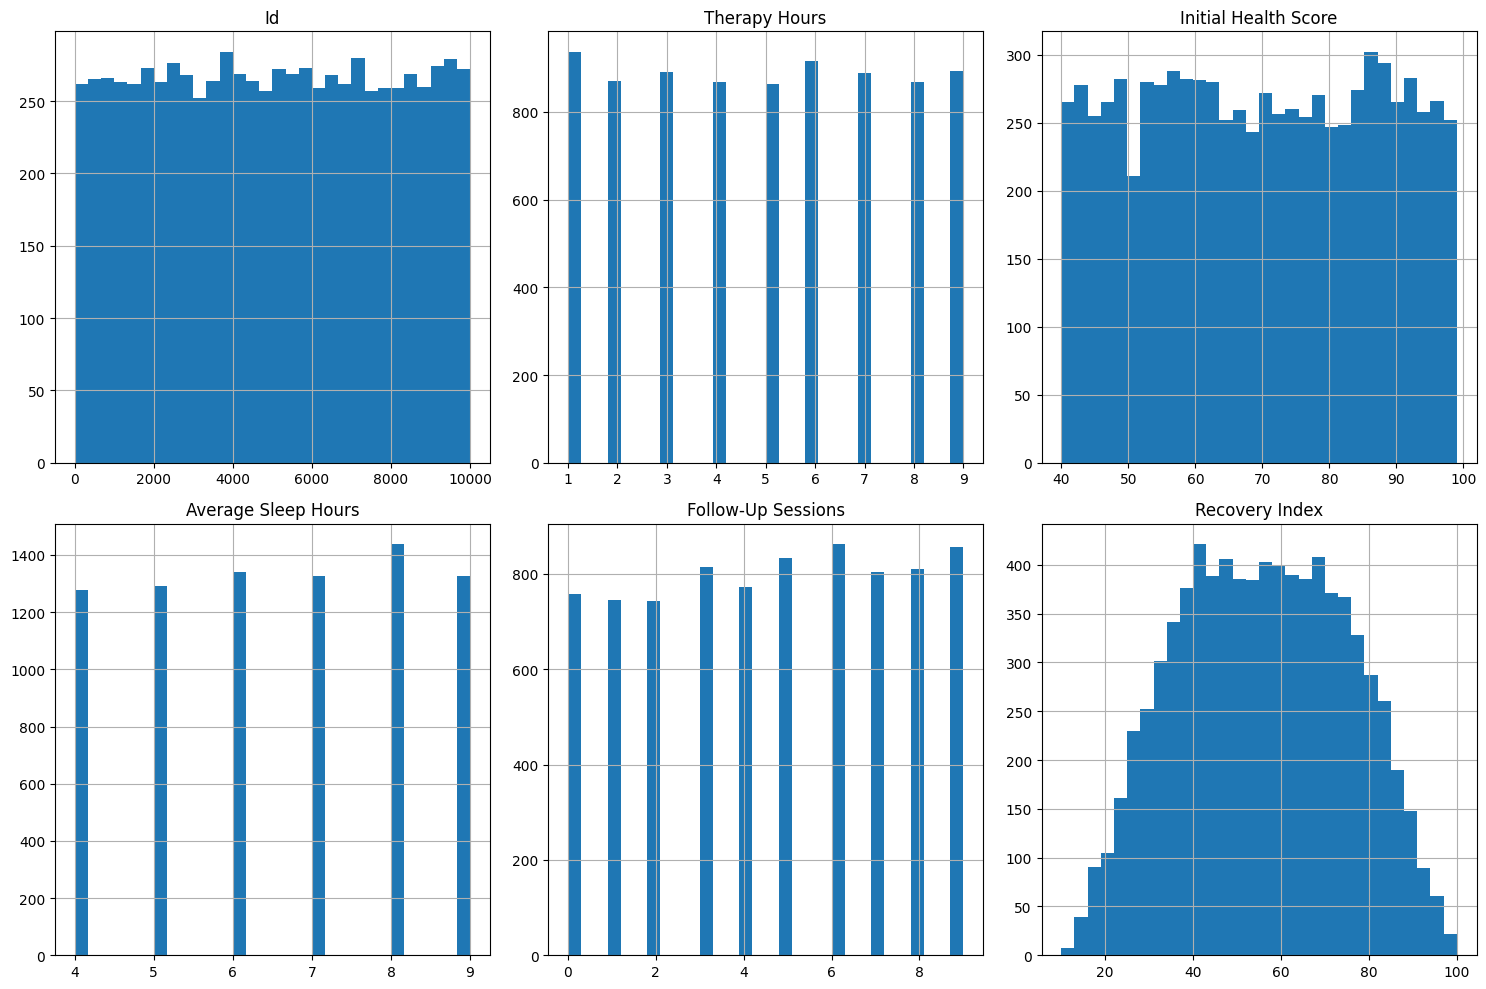

In [12]:
numerical_features = train.select_dtypes(include=np.number)

# 2. Plot histograms for each numerical feature
numerical_features.hist(bins=30, figsize=(15, 10), layout=(-1, 3))

# 3. Adjust layout and display the plots
plt.tight_layout()  # Adjusts plots to prevent overlap
plt.show()

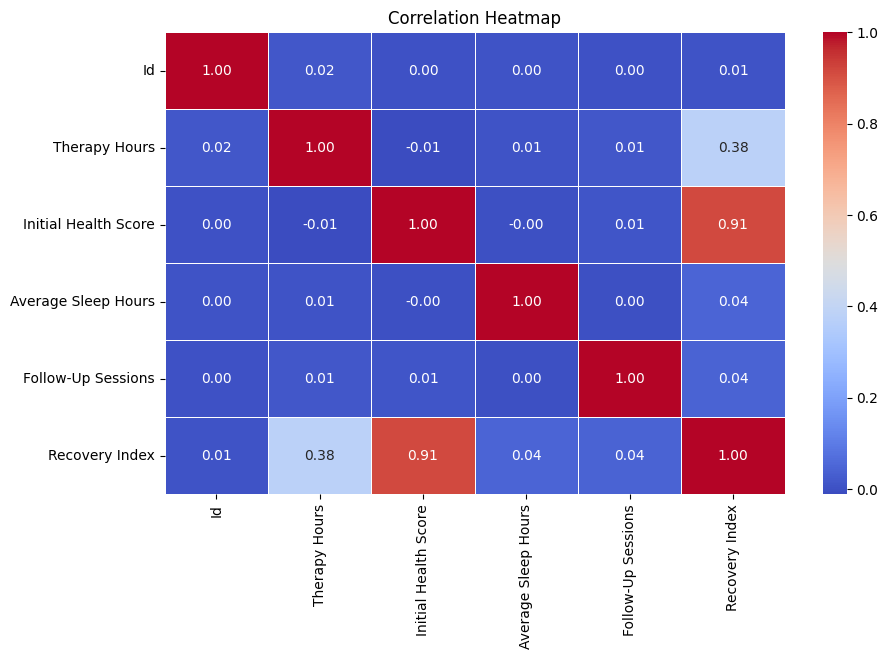

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns
corr = train.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

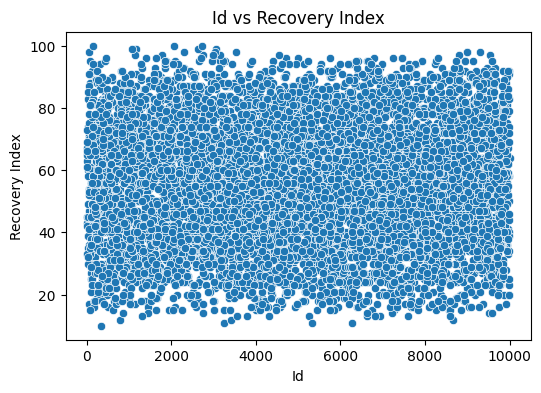

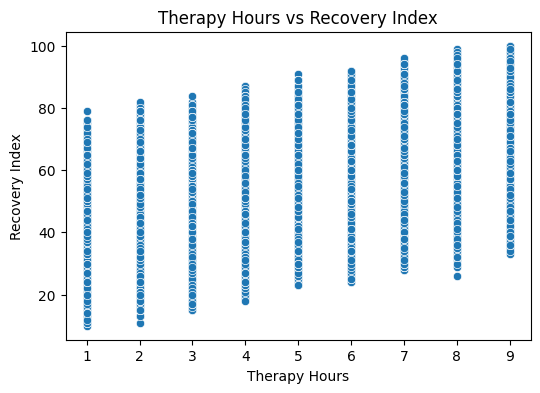

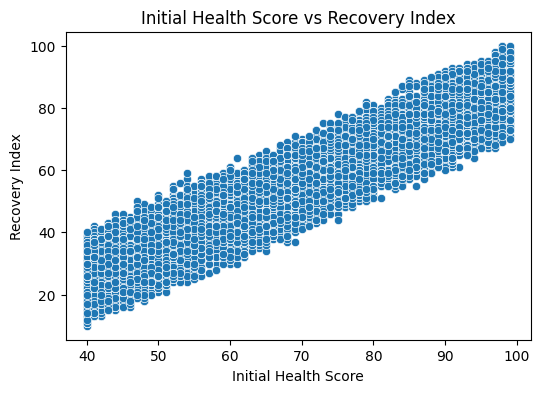

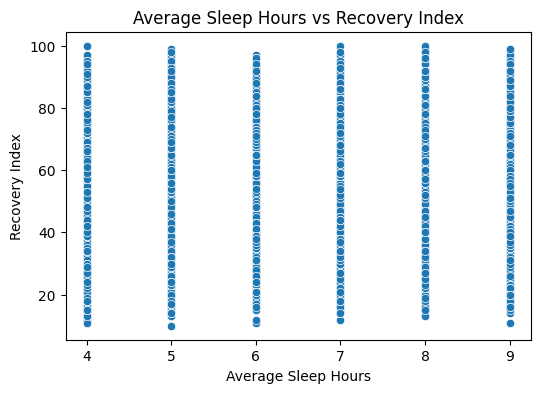

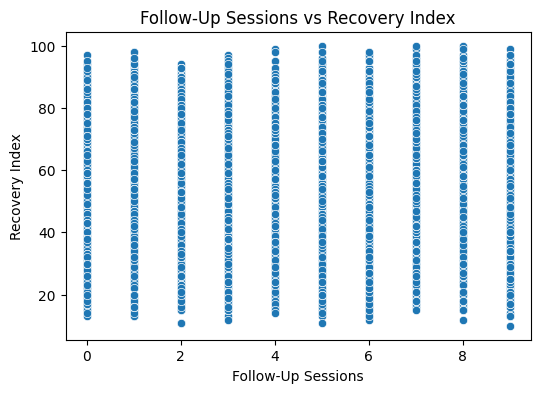

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get all numeric feature names except the target
features = train.select_dtypes(include=['int64', 'float64']).columns
features = [col for col in features if col != 'Recovery Index']

# Plot each feature vs Recovery Index
for col in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=train[col], y=train['Recovery Index'])
    plt.title(f'{col} vs Recovery Index')
    plt.xlabel(col)
    plt.ylabel('Recovery Index')
    plt.show()

###Categorical Feature Analysis

In [15]:
train['Lifestyle Activities'].value_counts()

,count
Lifestyle Activities,
No,4043
Yes,3957


In [16]:
print(train_low['Lifestyle Activities'].value_counts(), '\n')
print(train_high['Lifestyle Activities'].value_counts())


Lifestyle Activities
No     2031
Yes    1980
Name: count, dtype: int64 

Lifestyle Activities
No     2012
Yes    1977
Name: count, dtype: int64


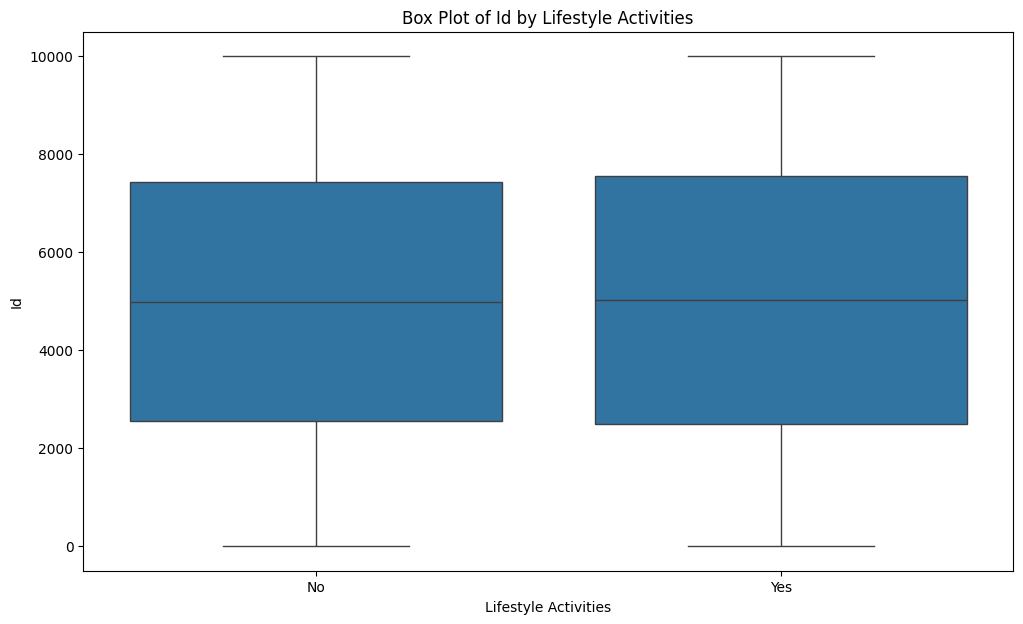

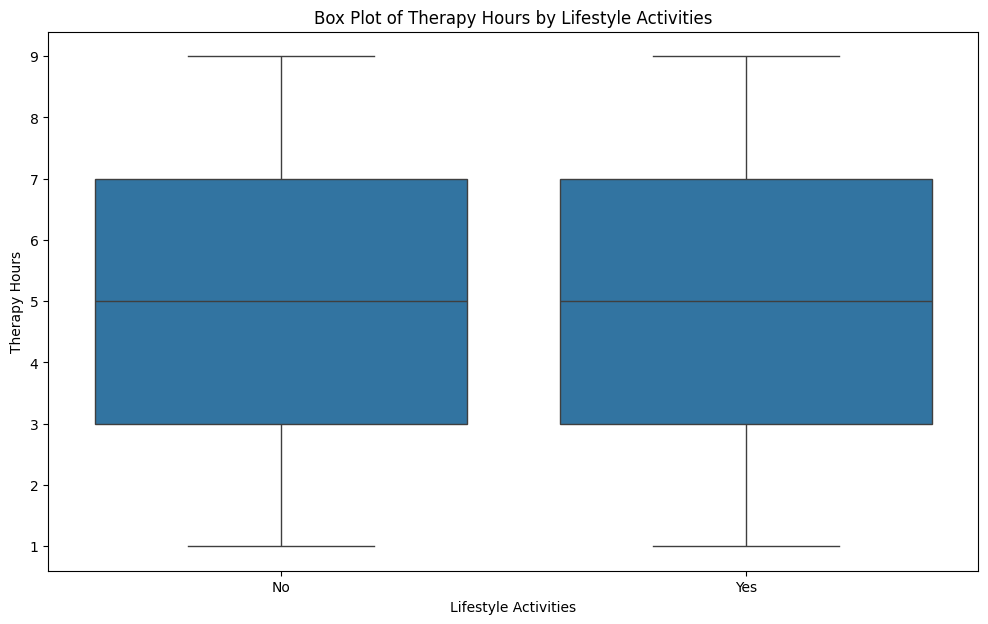

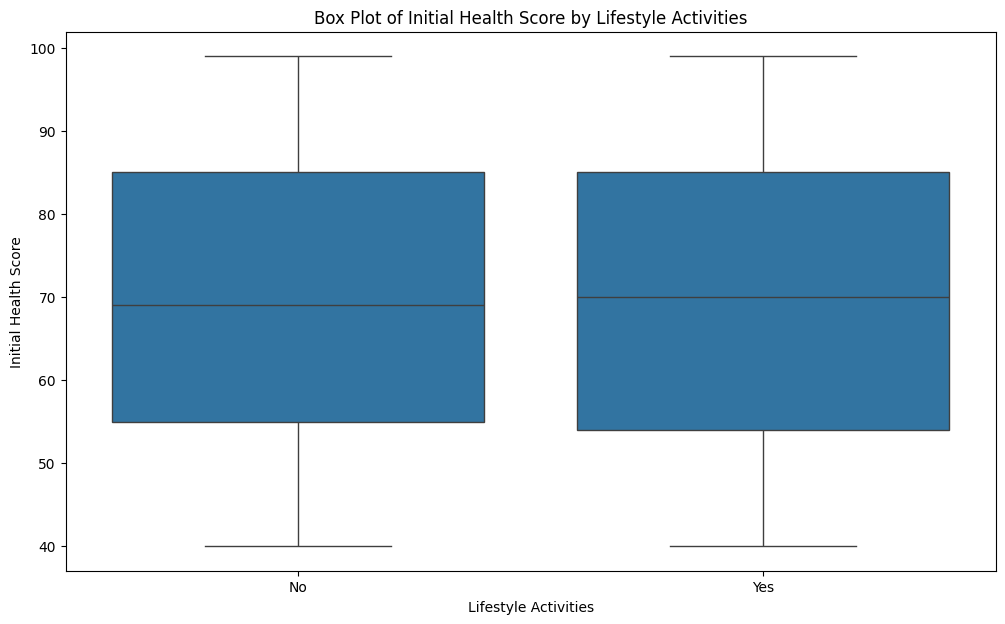

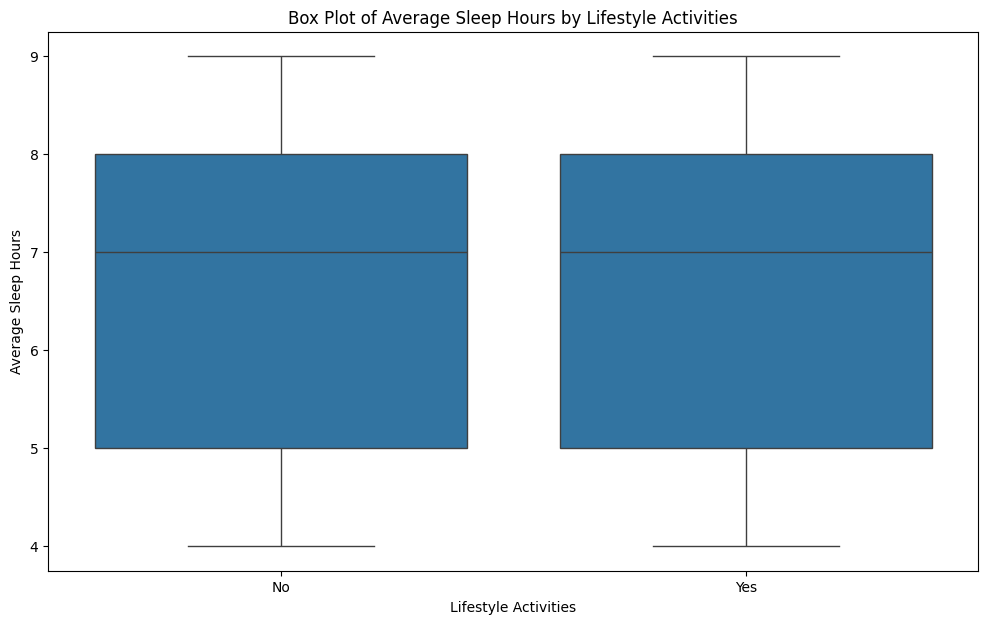

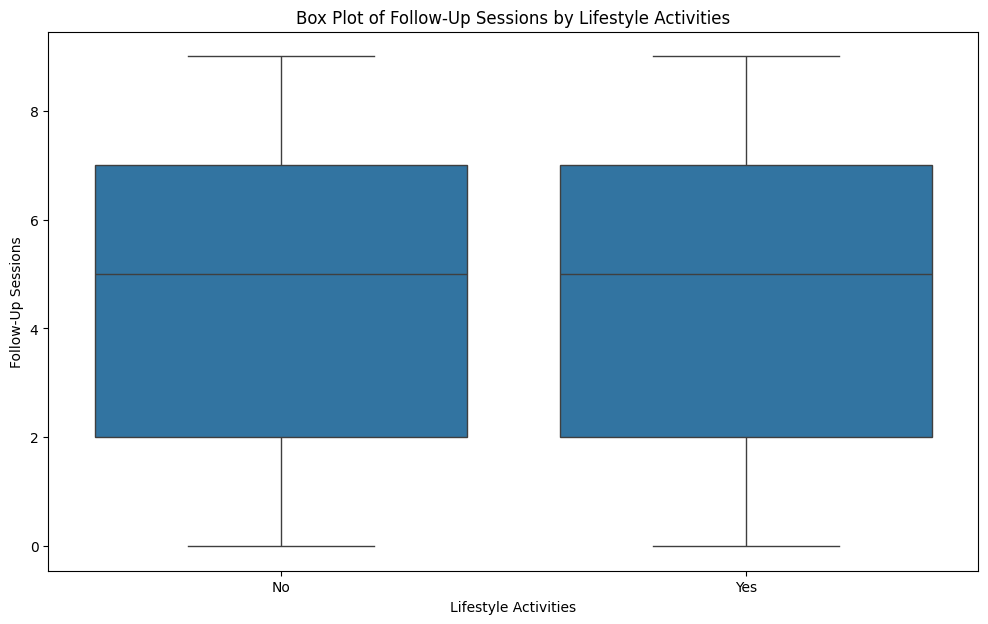

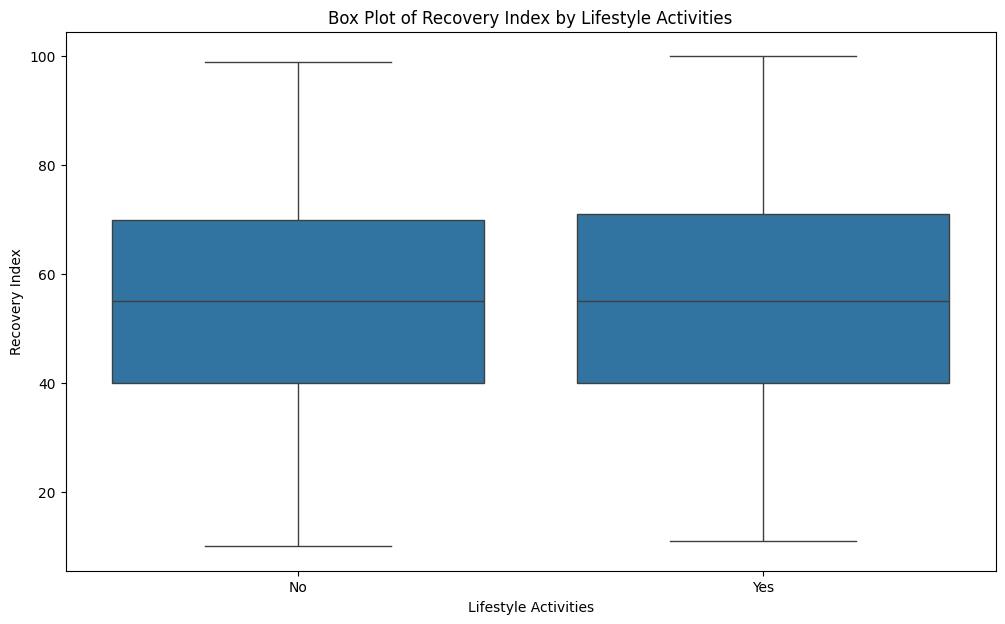

In [17]:
x_column = 'Lifestyle Activities'
for y_column in train.columns:

    if y_column == x_column:
        continue
    plt.figure(figsize=(12, 7)) # Use your preferred figure size
    sns.boxplot(data=train, x=x_column, y=y_column)
    plt.title(f'Box Plot of {y_column} by {x_column}')
    plt.show()

#Data Pre-Processing

In [18]:
train.drop(columns=['Id'], inplace=True)

##Train_Test Split

In [19]:
from sklearn.model_selection import train_test_split
x = train.drop('Recovery Index', axis=1).values
y = train['Recovery Index'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

##Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train[:, 2] = le.fit_transform(x_train[:, 2])
x_test[:, 2] = le.transform(x_test[:, 2])

##Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Drop Unnecessary Features(Optional)

In [21]:
#columns_to_drop = [2]
#x_train = np.delete(x_train, columns_to_drop, axis=1)
#x_test = np.delete(x_test, columns_to_drop, axis=1)

#Model Selection(Hyperparameter Tuning)

##Rounded_Scorer

In [22]:
from sklearn.metrics import make_scorer, mean_squared_error
def rounded_mse(y_true, y_pred):
    """
    Calculates Mean Squared Error on predictions
    that have been rounded to the nearest integer.
    """
    # Round the model's predictions
    y_pred_rounded = np.round(y_pred)

    # Calculate MSE on the rounded predictions
    return mean_squared_error(y_true, y_pred_rounded)

# 2. Create a scorer for GridSearchCV
# Note: We want to MINIMIZE MSE, so 'greater_is_better=False'
rounded_scorer = make_scorer(rounded_mse, greater_is_better=False)

##RandomForest

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import randint

model = RandomForestRegressor(random_state=0)

param_dist = {
    'n_estimators': [10,50,100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}


random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=0, verbose=2)

random_search.fit(x_train, y_train)


print("Best parameters found: ", random_search.best_params_)
print("Best negative mean squared error found: ", random_search.best_score_)


best_rf_model_rand = random_search.best_estimator_


yp = best_rf_model_rand.predict(x_test)
#yp = np.round(yp).astype(int)
r2_score = r2_score(y_test, yp)
print("R2 Score on the test set: ", r2_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30}
Best negative mean squared error found:  -4.977667865664164
R2 Score on the test set:  0.9858060610674226


##LinearRegression

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model = LinearRegression()
param_grid = {'positive':[True,False],
              'fit_intercept':[True,False]}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)
print("Best parameters found for Linear: ", grid_search.best_params_)
print("Best negative mean squared error found for Linear: ", grid_search.best_score_)

best_linear_model = grid_search.best_estimator_

# Evaluate the best model on the test data
yp = best_linear_model.predict(x_test)
#yp = np.round(yp).astype(int)
r2_score = r2_score(y_test, yp)
print("R2 Score on the test set: ", r2_score)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found for Linear:  {'fit_intercept': True, 'positive': True}
Best negative mean squared error found for Linear:  -4.118541922818288
R2 Score on the test set:  0.9879017925137008


##LinearRegression(GD)

In [25]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score
sgd = SGDRegressor(max_iter=7000, tol=1e-3, random_state=0)

param_grid = {
    'penalty': ['l2', 'l1','elasticnet',None],
    'alpha': [0,0.001, 0.01,0.1],
    'eta0': [0.001, 0.01,0.1,0.5] # The initial learning rate
}

# 3. Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# 4. Set up GridSearchCV
grid_search_sgd = GridSearchCV(estimator=sgd,
                               param_grid=param_grid,
                               cv=kf,
                               scoring='neg_mean_squared_error',
                               n_jobs=-1,
                               verbose=2)

# 5. Fit the model
grid_search_sgd.fit(x_train, y_train)

# 6. Print best parameters and score
print("Best parameters found for SGDRegressor: ", grid_search_sgd.best_params_)
print("Best negative mean squared error found for SGDRegressor: ", grid_search_sgd.best_score_)

# 7. Get the best model
best_sgd_model = grid_search_sgd.best_estimator_

# 8. Predict on the test set
yp_sgd = best_sgd_model.predict(x_test)

# 9. Calculate and print R2 score
r2 = r2_score(y_test, yp_sgd)
print("R2 Score on the test set with tuned SGDRegressor: ", r2)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found for SGDRegressor:  {'alpha': 0, 'eta0': 0.001, 'penalty': 'l2'}
Best negative mean squared error found for SGDRegressor:  -4.120316731045014
R2 Score on the test set with tuned SGDRegressor:  0.9879002566393063


##PolynomialRegression

In [40]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

poly_feature_names = [0,1,2,3,4]

preprocessor = ColumnTransformer(
    transformers=[
        ('poly', PolynomialFeatures(include_bias=False), poly_feature_names)
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('preprocess', preprocessor),
    ('linear', LinearRegression())
])

param_grid = {
    'preprocess__poly__degree': [2, 3],
    'linear__fit_intercept': [True, False],
    'linear__positive': [True, False]

}

kf = KFold(n_splits=5, shuffle=True, random_state=0)

grid_search_poly_selective = GridSearchCV(estimator=pipe,
                                         param_grid=param_grid,
                                         cv=kf,
                                         scoring='neg_mean_squared_error',
                                         n_jobs=-1,
                                         verbose=2)

grid_search_poly_selective.fit(x_train, y_train)

print("Best parameters found: ", grid_search_poly_selective.best_params_)
print("Best negative mean squared error found: ", grid_search_poly_selective.best_score_)

best_poly_model = grid_search_poly_selective.best_estimator_

yp_poly_selective = best_poly_model.predict(x_test)
r2 = r2_score(y_test, yp_poly_selective)
print("R2 Score on the test set: ", r2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'linear__fit_intercept': True, 'linear__positive': True, 'preprocess__poly__degree': 2}
Best negative mean squared error found:  -4.127238774740836
R2 Score on the test set:  0.9878845592866161


##Lasso

In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


lasso = Lasso(random_state=0)

param_grid = {'alpha': [0.01,0.1, 0.5, 1.0,2.0]}

kf = KFold(n_splits=5, shuffle=True, random_state=0)

grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

grid_search_lasso.fit(x_train, y_train)

print("Best parameters found for Lasso: ", grid_search_lasso.best_params_)
print("Best negative mean squared error found for Lasso: ", grid_search_lasso.best_score_)

best_lasso_model = grid_search_lasso.best_estimator_

yp = best_lasso_model.predict(x_test)
#yp = np.round(yp).astype(int)
r2 = r2_score(y_test, yp)
print("R2 Score on the test set with tuned Lasso: ", r2)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found for Lasso:  {'alpha': 0.01}
Best negative mean squared error found for Lasso:  -4.120488062144194
R2 Score on the test set with tuned Lasso:  0.9879035363098753


##Ridge

In [48]:
from sklearn.linear_model import Ridge  # Import Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

ridge = Ridge(random_state=0)


param_grid = {'alpha': [0.01,0.05, 0.09, 0.1, 0.5, 1.0, 2.0, 5.0]}


kf = KFold(n_splits=5, shuffle=True, random_state=0)


grid_search_ridge = GridSearchCV(estimator=ridge,
                                 param_grid=param_grid,
                                 cv=kf,
                                 scoring='neg_mean_squared_error',
                                 n_jobs=-1,
                                 verbose=2)


grid_search_ridge.fit(x_train, y_train)


print("Best parameters found for Ridge: ", grid_search_ridge.best_params_)
print("Best negative mean squared error found for Ridge: ", grid_search_ridge.best_score_)


best_ridge_model = grid_search_ridge.best_estimator_


yp_ridge = best_ridge_model.predict(x_test)


#yp_ridge = np.round(yp_ridge).astype(int)
r2 = r2_score(y_test, yp_ridge)
print("R2 Score on the test set with tuned Ridge: ", r2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found for Ridge:  {'alpha': 0.01}
Best negative mean squared error found for Ridge:  -4.119946568225436
R2 Score on the test set with tuned Ridge:  0.9879018076005106


##GradientBoosting

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score

gb = GradientBoostingRegressor(random_state=0)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

kf = KFold(n_splits=5, shuffle=True, random_state=0)

grid_search_gb = GridSearchCV(estimator=gb,
                              param_grid=param_grid,
                              cv=kf,
                              scoring='neg_mean_squared_error', # Or use your 'rounded_scorer'
                              n_jobs=-1,
                              verbose=2)

grid_search_gb.fit(x_train, y_train)

print("Best parameters found for Gradient Boosting: ", grid_search_gb.best_params_)
print("Best negative mean squared error found for Gradient Boosting: ", grid_search_gb.best_score_)

best_gb_model = grid_search_gb.best_estimator_

yp= best_gb_model.predict(x_test)

#yp = np.round(yp).astype(int)

r2 = r2_score(y_test, yp)
print("R2 Score on the test set with tuned Gradient Boosting: ", r2)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found for Gradient Boosting:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best negative mean squared error found for Gradient Boosting:  -4.4227976979342385
R2 Score on the test set with tuned Gradient Boosting:  0.9872148142871442


##XGBoost

In [59]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score

xgb = XGBRegressor(random_state=0, objective='reg:squarederror')

param_grid = {
    'n_estimators': [200, 300,400],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample':[0.7,0.9],
    'colsample_bytree':[0.7,0.9],
    'reg_alpha':[0.1,0.5,1],
    'reg_lambda':[0.1,0.5,1]

}

kf = KFold(n_splits=5, shuffle=True, random_state=0)

grid_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=0, verbose=2)


grid_search_xgb.fit(x_train, y_train)

print("Best parameters found for XGBoost: ", grid_search_xgb.best_params_)
print("Best negative mean squared error found for XGBoost: ", grid_search_xgb.best_score_)

best_xgb_model = grid_search_xgb.best_estimator_

yp = best_xgb_model.predict(x_test)

#yp = np.round(yp).astype(int)

r2 = r2_score(y_test, yp)
print("R2 Score on the test set with tuned XGBoost: ", r2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found for XGBoost:  {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Best negative mean squared error found for XGBoost:  -4.318661546707153
R2 Score on the test set with tuned XGBoost:  0.9874754548072815


#Making Prediction

In [56]:
test = pd.read_csv('test.csv')
xt = test.drop(columns=['Id']).values
xt[:,2] = le.transform(xt[:,2])
xt = scaler.transform(xt)
#xt = np.delete(xt, columns_to_drop, axis=1)
yp = best_xgb_model.predict(xt)
#yp = np.round(yp).astype(int)

In [57]:
prediction = pd.DataFrame({'Id': test['Id'].values,'Recovery Index': yp.flatten()})

display(prediction.head())

,Id,Recovery Index
0,6253,55.726702
1,4685,22.498970
2,1732,47.335920
3,4743,30.776745
4,4522,42.693540


#Output File

In [58]:
prediction.to_csv('submission_gb.csv', index=False)